In [1]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
# Read the CSV file :
data = pd.read_csv('recipes.csv')
data.head()

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.3
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN


In [5]:
# Task 1: Print the names of Columns that have null values

print(data.columns[data.isnull().any()])

Index(['FiberAmount', 'FiberpercentOfDailyNeed', 'VitaminB6Amount',
       'VitaminB6percentOfDailyNeed', 'ManganeseAmount',
       'ManganesepercentOfDailyNeed', 'SeleniumAmount',
       'SeleniumpercentOfDailyNeed', 'PotassiumAmount',
       'PotassiumpercentOfDailyNeed', 'VitaminB2Amount',
       'VitaminB2percentOfDailyNeed', 'VitaminCAmount',
       'VitaminCpercentOfDailyNeed', 'PhosphorusAmount',
       'PhosphoruspercentOfDailyNeed', 'FolateAmount',
       'FolatepercentOfDailyNeed', 'VitaminB5Amount',
       'VitaminB5percentOfDailyNeed', 'MagnesiumAmount',
       'MagnesiumpercentOfDailyNeed', 'IronAmount', 'IronpercentOfDailyNeed',
       'VitaminKAmount', 'VitaminKpercentOfDailyNeed', 'CopperAmount',
       'CopperpercentOfDailyNeed', 'VitaminAAmount',
       'VitaminApercentOfDailyNeed', 'VitaminB12Amount',
       'VitaminB12percentOfDailyNeed', 'VitaminDAmount',
       'VitaminDpercentOfDailyNeed', 'ZincAmount', 'ZincpercentOfDailyNeed',
       'VitaminEAmount', 'VitaminE

In [6]:
nan_values = data[data.columns[data.isna().any()]]
print (nan_values)

     FiberAmount  FiberpercentOfDailyNeed  VitaminB6Amount  \
0           3.81                    15.22             0.26   
1            NaN                      NaN              NaN   
2           4.60                    18.40             0.20   
3           3.45                    13.81              NaN   
4           2.41                     9.64             0.14   
..           ...                      ...              ...   
145         6.83                    27.32             0.25   
146         2.00                     8.02             0.04   
147        12.42                    49.66             1.25   
148         3.51                    14.03             0.23   
149         0.34                     1.36             0.05   

     VitaminB6percentOfDailyNeed  ManganeseAmount  \
0                          13.19             0.25   
1                            NaN              NaN   
2                          10.13             0.55   
3                            NaN           

In [8]:
# Task2: Print the recipes with the highest number of aggregateLikes

data.loc[data['aggregateLikes'].idxmax()]

Unnamed: 0                       50
vegetarian                    False
glutenFree                     True
dairyFree                      True
veryHealthy                   False
                              ...  
CalciumpercentOfDailyNeed      4.42
AlcoholAmount                   NaN
AlcoholpercentOfDailyNeed       NaN
CaffeineAmount                  NaN
CaffeinepercentOfDailyNeed      NaN
Name: 50, Length: 79, dtype: object

In [9]:
# Task 3: Handle the missing values of “calcium percent of Daily need”. Sort the resulting DataFrame by id column.
data['CalciumpercentOfDailyNeed'].fillna(data['CalciumpercentOfDailyNeed'].median(), inplace=True)
data.sort_values(by=['id'], inplace=True)

In [10]:
data

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22,NaN,NaN


In [11]:
# Task 4: Delete the columns that have null values == 141
# first count null values in every column
data.isnull().sum(axis = 0)

Unnamed: 0                      0
vegetarian                      0
glutenFree                      0
dairyFree                       0
veryHealthy                     0
                             ... 
CalciumpercentOfDailyNeed       0
AlcoholAmount                 129
AlcoholpercentOfDailyNeed     129
CaffeineAmount                141
CaffeinepercentOfDailyNeed    141
Length: 79, dtype: int64

In [12]:
# We see that 2 columns have null values == 141; CaffeineAmount & CaffeinepercentOfDailyNeed
# Those 2 columns need to be deleted
data = data.loc[:, (data.isnull().sum(axis=0) == 141)]

In [13]:
# check if the columns are droped
data.isnull().sum(axis = 0)

CaffeineAmount                141
CaffeinepercentOfDailyNeed    141
dtype: int64

In [14]:
data.head()

,CaffeineAmount,CaffeinepercentOfDailyNeed
83,NaN,NaN
43,NaN,NaN
104,34.04,11.35
95,NaN,NaN
52,NaN,NaN


In [15]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [16]:
# Read the CSV file :
data = pd.read_csv('recipes.csv')
data.head()

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.3
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN


In [17]:
# Task 3: Handle the missing values of “calcium percent of Daily need”. Sort the resulting DataFrame by id column.
data['CalciumpercentOfDailyNeed'].fillna(data['CalciumpercentOfDailyNeed'].median(), inplace=True)
data.sort_values(by=['id'], inplace=True)

In [18]:
# Task 4: Delete the columns that have null values == 141
# first count null values in every column
data.isnull().sum(axis = 0)

Unnamed: 0                      0
vegetarian                      0
glutenFree                      0
dairyFree                       0
veryHealthy                     0
                             ... 
CalciumpercentOfDailyNeed       0
AlcoholAmount                 129
AlcoholpercentOfDailyNeed     129
CaffeineAmount                141
CaffeinepercentOfDailyNeed    141
Length: 79, dtype: int64

In [28]:
data

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22,NaN,NaN


In [30]:
# Columns "CaffeineAmount" and "CaffeinepercentOfDailyNeed" has nul values == 141. 
# deleted these two columns
data.drop(['CaffeineAmount', 'CaffeinepercentOfDailyNeed'], axis = 1)

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminEAmount,VitaminEpercentOfDailyNeed,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,0.84,5.61,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,4.61,30.71,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,0.53,3.52,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,1.08,7.19,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,3.98,26.52,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,4.40,29.33,1.23,6.13,0.23,15.57,83.41,8.34,NaN,NaN
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,3.34,22.26,2.14,10.71,0.20,13.09,154.27,15.43,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,1.31,8.76,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN
39,39,True,True,True,False,7.0,6,1098357,Three Ingredient Frozen Pina Colada,214.60,...,NaN,NaN,1.05,5.25,0.19,12.66,52.87,5.29,13.36,74.22


In [32]:
# Task 5: Print the title of the recipes that are vegetarian == TRUE and glutenFree == True
task5_data= data[(data['vegetarian'] == True) & (data['glutenFree'] == True)]
task5_data

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.810,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,7.355,NaN,NaN,NaN,NaN
85,85,True,True,False,False,5.0,1,634798,Beet Slaw,104.01,...,0.35,1.77,0.03,2.07,37.69,3.770,NaN,NaN,NaN,NaN
100,100,True,True,False,False,7.0,1,635290,Blender Carrot Soup,57.73,...,0.84,4.19,0.06,3.92,87.36,8.740,NaN,NaN,NaN,NaN
107,107,True,True,True,False,3.0,1,635495,Blueberry Mojito Popsicles,114.86,...,0.27,1.35,0.02,1.56,16.49,1.650,1.25,6.96,NaN,NaN
96,96,True,True,False,False,4.0,1,636062,Breakfast Porridge,121.34,...,0.67,3.33,0.10,6.94,103.44,10.340,NaN,NaN,NaN,NaN
22,22,True,True,False,False,16.0,1,636600,Butternut Squash Soup,102.10,...,3.57,17.83,0.20,13.23,91.18,9.120,NaN,NaN,NaN,NaN
147,147,True,True,True,True,93.0,2,637297,Cauliflower Chickpea Stew,139.28,...,4.77,23.83,0.45,29.70,141.16,14.120,NaN,NaN,NaN,NaN
132,132,True,True,False,False,16.0,1,637705,Cherries and Yogurt Parfait,277.28,...,0.63,3.15,0.19,12.82,472.85,47.290,1.03,5.73,NaN,NaN
101,101,True,True,True,False,10.0,103,641227,Dandelion pesto,132.51,...,0.29,1.47,0.10,6.80,19.65,1.960,NaN,NaN,NaN,NaN


In [35]:
# Print title of all recipes
print(task5_data['title'])

0                              Banana Blueberry Pancakes
1                Basil and Orange Confit Compound Butter
85                                             Beet Slaw
100                                  Blender Carrot Soup
107                           Blueberry Mojito Popsicles
96                                    Breakfast Porridge
22                                 Butternut Squash Soup
147                            Cauliflower Chickpea Stew
132                          Cherries and Yogurt Parfait
101                                      Dandelion pesto
33                             Detox Orange Carrot Juice
27                                Easy Eggplant Parmesan
72                             EASY, CUMIN-LENTIL SPREAD
20                           Fire Roasted Tomato Chutney
119                                     Fried Brown Rice
24                         Green Beans with Garlic Chips
149          Indian-Style Dill and Turmeric Potato Salad
106                            

In [36]:
# Task 6: How many vegan recipes are there (Vegan = Vegetarian and dairy free)?
# This will print the number of rows where both Vegetarian and dairyFree are true
len(data[(data['vegetarian'] == True) & (data['dairyFree'] == True)])


29

In [37]:
# Task 7: Compare the average amount of Vitamin B12 for the vegan and non-vegan recipes. How reliable are the results?
# First we need to seperate vegarn and non-vegan data
data_vegan = data.loc[data.vegetarian == True]
data_non_vegan = data.loc[data.vegetarian == False]

In [38]:
# Calculate mean(average) of Vitamin B12 of Vegan data
mean_vegan = data_vegan['VitaminB12Amount'].mean(axis = 0, skipna = True)

# Calculate mean(average) of Vitamin B12 of non-vegan data
mean_non_vegan = data_non_vegan['VitaminB12Amount'].mean(axis = 0, skipna = True)

In [39]:
# Print avegare of Vitamin B12 for both vegan and non-vegans
print('Average of Vegan: ', mean_vegan)
print('Average of non-vegan: ', mean_non_vegan)

Average of Vegan:  0.48357142857142865
Average of non-vegan:  1.2353846153846157


In [40]:
# According the the results above, non-veg foods is composed of more VitaminB12 than veg foods. 
# The deficiency is normally treated by taking diet from foods like milk, eggs, and meat
# SEE Reference below
# https://www.webmd.com/a-to-z-guides/vitamin-b12-deficiency-anemia#2-5

In [41]:
# Task 8: Compare the average health Score for both types of recipes (vegan vs non-vegan).
# We already have data for both vegan and non-vegan.
# Calculate mean(average) of healthScore of Vegan data
avg_health_veg = data_vegan['healthScore'].mean(axis = 0, skipna = True)

# Calculate mean(average) of healthScore of non-vegan data
avg_health_non_veg = data_non_vegan['healthScore'].mean(axis = 0, skipna = True)

In [42]:
# Print avegare of Vitamin B12 for both vegan and non-vegans
print('Average Health Score of Veg food: ', avg_health_veg)
print('Average Health Score of non-veg food: ', avg_health_non_veg)

Average Health Score of Veg food:  18.484848484848484
Average Health Score of non-veg food:  22.107142857142858


In [43]:
# Non veg. food has higher average health score than vegetarian foods.  

In [2]:
# Task 9: Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, 
# but only if they already cost more than 100.
d_veg = data_vegan # copy veg data
# following code is creating a new variable to save decreasing pricePerServing by 10% if pricePerServing > 100
d_veg['VeganWeek'] = data_vegan.loc[data_vegan['pricePerServing'] > 100, 'pricePerServing' = data_vegan['pricePerServing'] - data_vegan['pricePerServing'] * 0.1


SyntaxError: invalid syntax (<ipython-input-2-97b2ca35d152>, line 5)

In [3]:
# Task 9: Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, 
# but only if they already cost more than 100.
d_veg = data_vegan # copy veg data
# following code is creating a new variable to save decreasing pricePerServing by 10% if pricePerServing > 100
# see link https://www.codegrepper.com/code-examples/python/change+pandas+column+value+based+on+condition
d_veg['VeganWeek'] = d_veg.loc[d_veg['pricePerServing'] > 100, 'pricePerServing' = d_veg['pricePerServing'] - d_veg['pricePerServing'] * 0.1


SyntaxError: invalid syntax (<ipython-input-3-ebe6b79c6709>, line 6)

In [4]:
# Task 9: Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, 
# but only if they already cost more than 100.
d_veg = data_vegan # copy veg data
# following code is creating a new variable to save decreasing pricePerServing by 10% if pricePerServing > 100
# see link https://www.codegrepper.com/code-examples/python/change+pandas+column+value+based+on+condition
d_veg['VeganWeek'] = d_veg.loc[d_veg['pricePerServing'] > 100, 'VeganWeek'] = d_veg['pricePerServing'] - d_veg['pricePerServing'] * 0.1

NameError: name 'data_vegan' is not defined

In [5]:
data

NameError: name 'data' is not defined

In [6]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [7]:
# Read the CSV file :
data = pd.read_csv('recipes.csv')
data.head()

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,0.49,2.44,0.03,2.26,18.11,1.81,NaN,NaN,NaN,NaN
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,False,False,False,False,3.0,1,635085,Black Bottom Banana Bars,78.85,...,2.63,13.13,0.32,21.09,100.80,10.08,0.28,1.53,9.89,3.3
3,3,True,False,True,False,2.0,1,663229,The Best Raw Chocolate Chip Cookies,54.64,...,0.65,3.26,0.10,6.47,26.79,2.68,NaN,NaN,NaN,NaN
4,4,False,True,False,False,31.0,3,651437,Mediterranean Spinach Artichoke Dip,115.26,...,0.66,3.29,0.07,4.64,162.84,16.28,NaN,NaN,NaN,NaN


In [8]:
# Task 3: Handle the missing values of “calcium percent of Daily need”. Sort the resulting DataFrame by id column.
data['CalciumpercentOfDailyNeed'].fillna(data['CalciumpercentOfDailyNeed'].median(), inplace=True)
data.sort_values(by=['id'], inplace=True)

In [9]:
# Task 4: Delete the columns that have null values == 141
# first count null values in every column
data.isnull().sum(axis = 0)

Unnamed: 0                      0
vegetarian                      0
glutenFree                      0
dairyFree                       0
veryHealthy                     0
                             ... 
CalciumpercentOfDailyNeed       0
AlcoholAmount                 129
AlcoholpercentOfDailyNeed     129
CaffeineAmount                141
CaffeinepercentOfDailyNeed    141
Length: 79, dtype: int64

In [10]:
# Task 5: Print the title of the recipes that are vegetarian == TRUE and glutenFree == True
task5_data= data[(data['vegetarian'] == True) & (data['glutenFree'] == True)]

In [11]:
# Print title of all recipes
print(task5_data['title'])

0                              Banana Blueberry Pancakes
1                Basil and Orange Confit Compound Butter
85                                             Beet Slaw
100                                  Blender Carrot Soup
107                           Blueberry Mojito Popsicles
96                                    Breakfast Porridge
22                                 Butternut Squash Soup
147                            Cauliflower Chickpea Stew
132                          Cherries and Yogurt Parfait
101                                      Dandelion pesto
33                             Detox Orange Carrot Juice
27                                Easy Eggplant Parmesan
72                             EASY, CUMIN-LENTIL SPREAD
20                           Fire Roasted Tomato Chutney
119                                     Fried Brown Rice
24                         Green Beans with Garlic Chips
149          Indian-Style Dill and Turmeric Potato Salad
106                            

In [12]:
# Task 6: How many vegan recipes are there (Vegan = Vegetarian and dairy free)?
# This will print the number of rows where both Vegetarian and dairyFree are true
len(data[(data['vegetarian'] == True) & (data['dairyFree'] == True)])

29

In [13]:
# Task 7: Compare the average amount of Vitamin B12 for the vegan and non-vegan recipes. How reliable are the results?
# First we need to seperate vegarn and non-vegan data
data_vegan = data.loc[data.vegetarian == True]
data_non_vegan = data.loc[data.vegetarian == False]

In [14]:
# Calculate mean(average) of Vitamin B12 of Vegan data
mean_vegan = data_vegan['VitaminB12Amount'].mean(axis = 0, skipna = True)

# Calculate mean(average) of Vitamin B12 of non-vegan data
mean_non_vegan = data_non_vegan['VitaminB12Amount'].mean(axis = 0, skipna = True)

In [15]:
# Print avegare of Vitamin B12 for both vegan and non-vegans
print('Average of Vegan: ', mean_vegan)
print('Average of non-vegan: ', mean_non_vegan)

Average of Vegan:  0.48357142857142865
Average of non-vegan:  1.2353846153846157


In [16]:
# According the the results above, non-veg foods is composed of more VitaminB12 than veg foods. 
# The deficiency is normally treated by taking diet from foods like milk, eggs, and meat
# SEE Reference below
# https://www.webmd.com/a-to-z-guides/vitamin-b12-deficiency-anemia#2-5

In [17]:
# Task 8: Compare the average health Score for both types of recipes (vegan vs non-vegan).
# We already have data for both vegan and non-vegan.
# Calculate mean(average) of healthScore of Vegan data
avg_health_veg = data_vegan['healthScore'].mean(axis = 0, skipna = True)

# Calculate mean(average) of healthScore of non-vegan data
avg_health_non_veg = data_non_vegan['healthScore'].mean(axis = 0, skipna = True)

In [18]:
# Print avegare of Vitamin B12 for both vegan and non-vegans
print('Average Health Score of Veg food: ', avg_health_veg)
print('Average Health Score of non-veg food: ', avg_health_non_veg)

Average Health Score of Veg food:  18.484848484848484
Average Health Score of non-veg food:  22.107142857142858


In [19]:
# Non veg. food has higher average health score than vegetarian foods.  

In [20]:
# Task 9: Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, 
# but only if they already cost more than 100.
d_veg = data_vegan # copy veg data
# following code is creating a new variable to save decreasing pricePerServing by 10% if pricePerServing > 100
# see link https://www.codegrepper.com/code-examples/python/change+pandas+column+value+based+on+condition
d_veg['VeganWeek'] = d_veg.loc[d_veg['pricePerServing'] > 100, 'VeganWeek'] = d_veg['pricePerServing'] - d_veg['pricePerServing'] * 0.1

<ipython-input-20-96901d28f472>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_veg['VeganWeek'] = d_veg.loc[d_veg['pricePerServing'] > 100, 'VeganWeek'] = d_veg['pricePerServing'] - d_veg['pricePerServing'] * 0.1
/Users/majidkhan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [21]:
# Task 9: Create a new column: "VeganWeek" where you decrease the price of vegan products by 10%, 
# but only if they already cost more than 100.
d_veg = data_vegan # copy veg data
# following code is creating a new variable to save decreasing pricePerServing by 10% if pricePerServing > 100
# see link https://www.codegrepper.com/code-examples/python/change+pandas+column+value+based+on+condition
d_veg.loc[d_veg['pricePerServing'] > 100, 'VeganWeek'] = d_veg['pricePerServing'] - d_veg['pricePerServing'] * 0.1

/Users/majidkhan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:
d_veg

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed,VeganWeek
108,108,True,False,False,True,100.0,1,633824,Baked Stuffed Potatoes (Tandoori Potatoes),470.50,...,5.94,0.19,12.41,200.01,20.000,NaN,NaN,NaN,NaN,423.450
0,0,True,True,True,False,1.0,3,633998,Banana Blueberry Pancakes,55.79,...,2.44,0.03,2.26,18.11,1.810,NaN,NaN,NaN,NaN,50.211
1,1,True,True,False,False,0.0,1,634426,Basil and Orange Confit Compound Butter,15.07,...,NaN,NaN,NaN,NaN,7.355,NaN,NaN,NaN,NaN,13.563
85,85,True,True,False,False,5.0,1,634798,Beet Slaw,104.01,...,1.77,0.03,2.07,37.69,3.770,NaN,NaN,NaN,NaN,93.609
74,74,True,False,False,False,0.0,1,634816,Beignets,19.00,...,NaN,0.02,1.21,NaN,7.355,NaN,NaN,NaN,NaN,17.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,129,True,True,True,False,14.0,1,1096178,"Blueberry, Persimmon Smoothie with Banana and ...",48.70,...,14.85,0.06,3.78,59.51,5.950,NaN,NaN,NaN,NaN,43.830
126,126,True,True,True,False,21.0,1,1096231,Slow Cooker Healthy Sweet Potato Soup with Coc...,418.08,...,9.99,0.26,17.24,104.01,10.400,NaN,NaN,NaN,NaN,376.272
134,134,True,True,True,True,77.0,1,1096268,Garlic-Roasted Brussels Sprouts Side Dish,170.34,...,6.13,0.23,15.57,83.41,8.340,NaN,NaN,NaN,NaN,153.306
30,30,True,True,True,False,17.0,1,1096306,Vegan Chana Masala Curry,165.89,...,10.71,0.20,13.09,154.27,15.430,NaN,NaN,NaN,NaN,149.301


In [26]:
# I was getting errors for Task 9 but when I checked d_veg data, I found that the column is already created and
# values are correctly calculated

In [31]:
d_non_veg = data_non_vegan

In [32]:
d_non_veg

,Unnamed: 0,vegetarian,glutenFree,dairyFree,veryHealthy,healthScore,aggregateLikes,id,title,pricePerServing,...,VitaminB3Amount,VitaminB3percentOfDailyNeed,VitaminB1Amount,VitaminB1percentOfDailyNeed,CalciumAmount,CalciumpercentOfDailyNeed,AlcoholAmount,AlcoholpercentOfDailyNeed,CaffeineAmount,CaffeinepercentOfDailyNeed
83,83,False,False,False,False,5.0,0,45945,Oeufs En Meurette,209.85,...,1.51,7.56,0.15,10.13,124.54,12.45,NaN,NaN,NaN,NaN
43,43,False,False,False,False,44.0,1,622825,Tortilla Burger Loco Vaca,407.86,...,12.82,64.12,0.35,23.42,281.97,28.20,NaN,NaN,NaN,NaN
104,104,False,False,False,False,4.0,1,631769,"Bad Boy"" Giant Double Chocolate Cookies",44.08,...,1.73,8.63,0.20,13.42,64.05,6.41,NaN,NaN,34.04,11.35
95,95,False,True,True,False,9.0,1,632084,Allergy-Free Stuffed Portobello Mushrooms,138.47,...,4.59,22.96,0.09,6.05,28.08,2.81,NaN,NaN,NaN,NaN
52,52,False,False,False,False,2.0,16,632101,Almond Butter and Chocolate Squares,92.26,...,0.81,4.04,0.04,2.51,86.99,8.70,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,92,False,True,False,True,62.0,1,1096005,Mexican Lettuce Wraps & Spanish Rice,463.30,...,20.49,102.46,0.73,48.94,245.61,24.56,NaN,NaN,NaN,NaN
46,46,False,False,False,False,49.0,1,1096242,Chicken Stew with a Herb Crust,488.56,...,15.87,79.35,0.54,35.94,491.80,49.18,5.15,28.61,NaN,NaN
5,5,False,True,True,False,30.0,1,1096267,Turkey Burgers with Slaw,387.61,...,18.27,91.37,0.19,12.44,42.49,4.25,NaN,NaN,NaN,NaN
118,118,False,True,True,False,38.0,1,1096323,Potato & Leek Soup with Roasted Beets,244.08,...,2.43,12.15,0.10,6.47,101.41,10.14,NaN,NaN,NaN,NaN


In [33]:
# Task 10: Among the non-vegan recipes, find the one requiring most time to prepare. How is it called?
d_non_veg.loc[d_non_veg['readyInMinutes'].idxmax()]
# finds the max value in a column and print the row

Unnamed: 0                       83
vegetarian                    False
glutenFree                    False
dairyFree                     False
veryHealthy                   False
                              ...  
CalciumpercentOfDailyNeed     12.45
AlcoholAmount                   NaN
AlcoholpercentOfDailyNeed       NaN
CaffeineAmount                  NaN
CaffeinepercentOfDailyNeed      NaN
Name: 83, Length: 79, dtype: object

In [34]:
nv_most_time_to_prepare = d_non_veg.loc[d_non_veg['readyInMinutes'].idxmax()]


In [36]:
nv_most_time_to_prepare[['vegetarian', 'title', 'readyInMinutes']]

vegetarian                    False
title             Oeufs En Meurette
readyInMinutes                  328
Name: 83, dtype: object

In [37]:
# Oeufs En Meurette is the non-veg recipe that takes the most time to prepare i.e 328 minutes. 

In [49]:
# Task 11: Build a model using linear regression on this dataset
# The features I am considering under consideration are "CaloriesAmount" and "VitaminB12Amount"
data = data[['CaloriesAmount','ProteinAmount']]

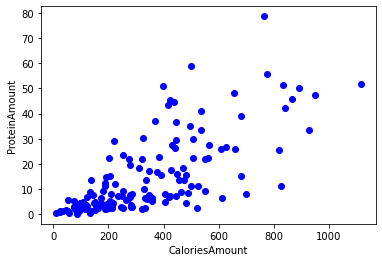

In [50]:
# Plot the data
# CaloriesAmount vs VitaminB12Amount:
plt.scatter(data['CaloriesAmount'] , data['ProteinAmount'] , color='blue')
plt.xlabel('CaloriesAmount')
plt.ylabel('ProteinAmount')
plt.show()

In [51]:
# Divide the data into Training and Testing
# To check the accuracy of a model, we are going to divide our data into training and testing datasets.
# We will use training data to train our model, and then we will check the accuracy of our model using
# the testing dataset.

# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [53]:
# Training our model: Here is how we can train our model and find the coefficients for our best-fit regression line.
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['CaloriesAmount']])
train_y = np.array(train[['ProteinAmount']])
regr.fit(train_x,train_y)

LinearRegression()

In [54]:
# Plot the best fit line: Based on the coefficients, we can plot the best fit line for our dataset.
# The coefficients:
print ('coefficients :' ,regr.coef_) #Slope
print ('Intercept : ',regr.intercept_) #Intercept

coefficients : [[0.04986353]]
Intercept :  [-2.07979899]


Text(0, 0.5, 'Protien Amount')

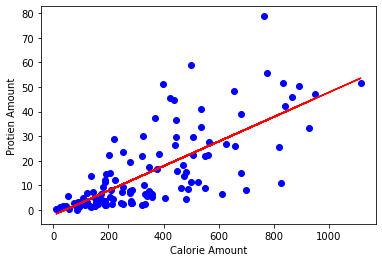

In [55]:
# Prediction function: We are going to use a prediction function for our testing dataset.
# Plotting the regression line:
plt.scatter(train['CaloriesAmount'], train['ProteinAmount'], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Calorie Amount')
plt.ylabel('Protien Amount')

In [56]:
# Predicting ProteinAmount: Predicting the values of ProteinAmount based on the regression line.
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [57]:
# Checking accuracy for test data : We can check the accuracy of a model by comparing the actual 
# values with the predicted values in our dataset.
# Predicting ProteinAmount in Calories:
no_of_calories = 320
estimatd_no_of_proteins = get_regression_predictions(no_of_calories,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_no_of_proteins)

Estimated Emission : 13.876529727980264


In [58]:
print ('Estimated Protiens Amount :',estimatd_no_of_proteins)

Estimated Protiens Amount : 13.876529727980264


In [59]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['CaloriesAmount']])
test_y = np.array(test[['ProteinAmount']])
test_y_ = regr.predict(test_x)

In [60]:
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Mean sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y) )

Mean absolute error: 6.27
Mean sum of squares (MSE): 73.81
R2-score: -0.24
